In [37]:
### setup ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re # data cleaning
import emoji # data cleaning
import nltk # data cleaning
import string # data cleaning
from sklearn.feature_extraction.text import CountVectorizer # data preparation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to /Users/ercongluo/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [21]:
df = pd.read_csv("twitter_binary_classification.csv")
df.drop_duplicates()
print(df.shape)
df.head(10)

(4935, 5)


,user_id,text,country,location,label
0,19914257,"Joe Biden's entire life has been crafted, in m...",NaN,"Arlington, VA",ICE
1,1140736721753182208,Aint she the one that was washing cars and giv...,NaN,She/Her,ICE
2,831285669477699584,@RepAshleyHinson @RepAngieCraig @RodneyDavis @...,NaN,"Maryland, USA",ICE
3,14252968,@BunRab @UrsulaV @ldpm I remember the I-35 upp...,NaN,NaN,ICE
4,16306558,@fadeaccompli @UrsulaV @ldpm You remember at a...,NaN,"Baltimore, Maryland, USA",ICE
5,1405643130,#German #climate policy in the making:\n\n- #c...,NaN,"Helsinki, Finland",ICE
6,218307802,@TomStDenis2 @StephenBlais @fordnation @OntLib...,NaN,"Ottawa, Ontario",ICE
7,3788455876,You Might Be Creepy Cases Of Cars Into Ice Cre...,NaN,NaN,ICE
8,1385288779712323595,@Milnoc @StephenBlais @fordnation @OntLiberal ...,NaN,NaN,ICE
9,1385288779712323595,Or is it because many ICE vehicles are still b...,NaN,NaN,ICE


In [73]:
df.to_csv("tweets.csv")

In [22]:
df = df[['text', 'label']]
df.head(10)

,text,label
0,"Joe Biden's entire life has been crafted, in m...",ICE
1,Aint she the one that was washing cars and giv...,ICE
2,@RepAshleyHinson @RepAngieCraig @RodneyDavis @...,ICE
3,@BunRab @UrsulaV @ldpm I remember the I-35 upp...,ICE
4,@fadeaccompli @UrsulaV @ldpm You remember at a...,ICE
5,#German #climate policy in the making:\n\n- #c...,ICE
6,@TomStDenis2 @StephenBlais @fordnation @OntLib...,ICE
7,You Might Be Creepy Cases Of Cars Into Ice Cre...,ICE
8,@Milnoc @StephenBlais @fordnation @OntLiberal ...,ICE
9,Or is it because many ICE vehicles are still b...,ICE


In [27]:
### Some data cleaning for each tweet: 
def cleaner(tweet):
    tweet = tweet.lower() # to lower case
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    
    # documentation for the following chunks of code: https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
for i in range(df.shape[0]):
    df.text[i] = cleaner(df.text[i])

In [28]:
df.head(10)

,text,label
0,joe entire life been in many ways around — the...,ICE
1,aint she the one that was washing and giving a...,ICE
2,by any necessary protect our precious from des...,ICE
3,i remember the i35 upper deck traffic camera f...,ICE
4,you remember at all where we lived in travis a...,ICE
5,german climate policy in the making coal by 20...,ICE
6,tomstdenis2 with the exception of ice do not c...,ICE
7,you might be creepy of into ice cream get style,ICE
8,your right ice catch fire so often that it doe...,ICE
9,or is it because many ice are still bog stupid...,ICE


In [53]:
# split test and training sets: 
vectorizer = CountVectorizer(stop_words = "english")
X = vectorizer.fit_transform(df.text)
Y = df.label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)    

In [128]:
pd.DataFrame(data = X_train.toarray(), columns = vectorizer.vocabulary_.keys()).head(10)

,joe,entire,life,ways,affection,love,ice,cream,wheel,car,...,25k,httpstco5asg1hpqfk,httpstcoxm5qfrptcr,vat,predominate,httpstcoc8ha0ngu2s,httpstcoohl5ziqfcv,ubiquity,bottleneck,httpstco9wtpiokzsr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Train NB, multinomial is the best model in this case
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha = 1, 
                   fit_prior = True)
#Train model
model.fit(X_train, Y_train)

MultinomialNB(alpha=1)

In [61]:
Y_pred = model.predict(X_test)

In [62]:
confusion_matrix(Y_test, Y_pred)

array([[550,  39],
       [ 32, 366]])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.92806484295846

In [65]:
def plot_confusion_matrix(Y_pred, Y_test):
    fig, ax = plt.subplots(figsize=(5, 5))
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    ax.matshow(conf_matrix, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predicted Label', fontsize=18)
    plt.ylabel('True Label', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

Confusion Matrix on Test Dataset


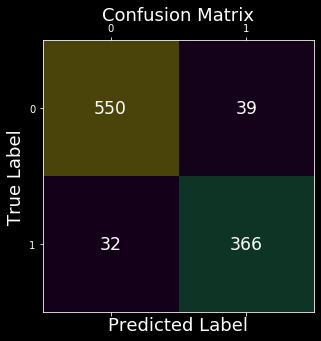

0 for EV and 1 for ICE cars.
Confusion Matrix on Training Dataset


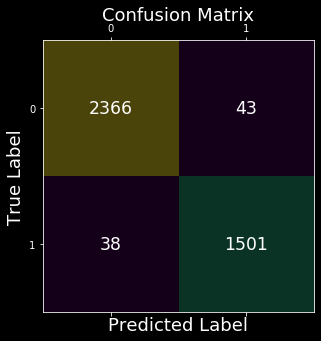

0 for EV and 1 for ICE cars.


In [137]:
### For NB, plot confusion matrix
print("Confusion Matrix on Test Dataset")
plot_confusion_matrix(Y_pred, Y_test)
print("0 for EV and 1 for ICE cars.")

print("Confusion Matrix on Training Dataset")
plot_confusion_matrix(model.predict(X_train), Y_train)
print("0 for EV and 1 for ICE cars.")

In [74]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

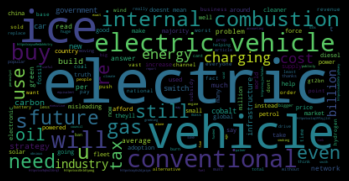

In [131]:
text10 = "".join(df.text[(model.predict(X) == "EV") & (Y == "ICE")])
wordcloud = WordCloud().generate(text10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

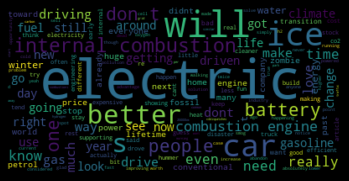

In [132]:
text01 = "".join(df.text[(model.predict(X) == "ICE") & (Y == "EV")])
wordcloud = WordCloud().generate(text01)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

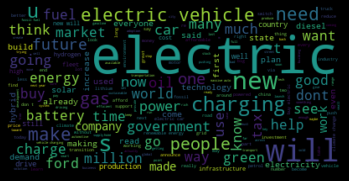

In [138]:
text00 = "".join(df.text[(model.predict(X) == "EV") & (Y == "EV")])
wordcloud = WordCloud().generate(text00)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

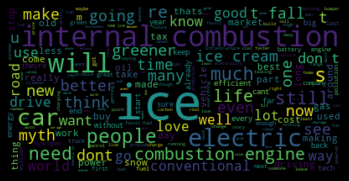

In [139]:
text11 = "".join(df.text[(model.predict(X) == "ICE") & (Y == "ICE")])
wordcloud = WordCloud().generate(text11)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()